# Assignment 3
### Due 9/23. Do four of five.

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1. 
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

In [2]:
nhanes_df = pd.read_csv("data/nhanes_data_17_18.csv")
nhanes_df.head()

subset_df = nhanes_df[["TriedToLoseWeightInPastYear", "GeneralHealthCondition"]]
subset_df["TriedToLoseWeightInPastYear"] = subset_df["TriedToLoseWeightInPastYear"].replace({1: "True", 0.0: "False"})
print(subset_df["TriedToLoseWeightInPastYear"].isna().sum()/len(subset_df))
print(subset_df["GeneralHealthCondition"].isna().sum()/len(subset_df))
simple_df = subset_df.dropna()

0.3919435811618456
0.2871145111164236


/tmp/ipykernel_47030/2627122558.py:1: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  nhanes_df = pd.read_csv("data/nhanes_data_17_18.csv")
/tmp/ipykernel_47030/2627122558.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["TriedToLoseWeightInPastYear"] = subset_df["TriedToLoseWeightInPastYear"].replace({1: "True", 0.0: "False"})


In [89]:
pd.crosstab(simple_df["TriedToLoseWeightInPastYear"], simple_df["GeneralHealthCondition"], normalize="columns")

GeneralHealthCondition,Excellent,Fair or,Good,Poor?,Very good
TriedToLoseWeightInPastYear,,,,,
False,0.68071,0.564367,0.579349,0.606667,0.618321
True,0.31929,0.435633,0.420651,0.393333,0.381679


2. 
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

In [66]:
nhanes_df.head()
subset_df_2 = nhanes_df[["GeneralHealthCondition","AvgCigarettesdayDuringPast30Days"]]
subset_df_2.fillna({"AvgCigarettesdayDuringPast30Days":0}, inplace=True)
subset_df_2 = subset_df_2[subset_df_2["AvgCigarettesdayDuringPast30Days"]<770]

/tmp/ipykernel_47030/2817985345.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df_2.fillna({"AvgCigarettesdayDuringPast30Days":0}, inplace=True)


In [90]:
pd.crosstab(subset_df_2["AvgCigarettesdayDuringPast30Days"], subset_df_2["GeneralHealthCondition"], normalize="columns")

GeneralHealthCondition,Excellent,Fair or,Good,Poor?,Very good
AvgCigarettesdayDuringPast30Days,,,,,
0.0,0.912763,0.763404,0.843113,0.755814,0.900194
1.0,0.006462,0.008511,0.008557,0.011628,0.009073
2.0,0.011309,0.013617,0.012225,0.011628,0.009721
3.0,0.011309,0.013617,0.011817,0.011628,0.005185
4.0,0.008078,0.007660,0.006520,0.005814,0.009721
5.0,0.006462,0.013617,0.013855,0.011628,0.007777
6.0,0.003231,0.011915,0.009780,0.005814,0.001944
7.0,0.006462,0.011064,0.005297,0.000000,0.005185
8.0,0.001616,0.005957,0.003667,0.005814,0.002592


<Axes: xlabel='GeneralHealthCondition', ylabel='AvgCigarettesdayDuringPast30Days'>

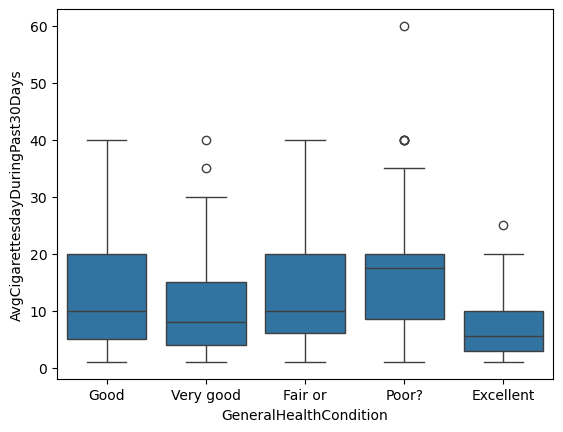

In [72]:
sns.boxplot(data=subset_df_2[subset_df_2["AvgCigarettesdayDuringPast30Days"]>0], x="GeneralHealthCondition", y="AvgCigarettesdayDuringPast30Days")

Text(0, 0.5, 'Counts')

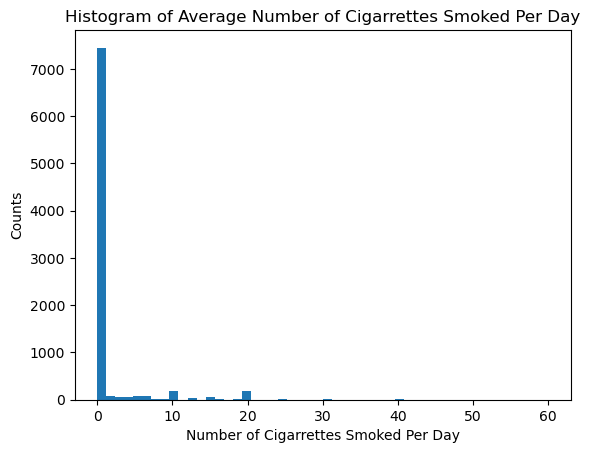

In [88]:
plt.hist(subset_df_2["AvgCigarettesdayDuringPast30Days"], bins=50)
plt.title("Histogram of Average Number of Cigarrettes Smoked Per Day")
plt.xlabel("Number of Cigarrettes Smoked Per Day")
plt.ylabel("Counts")

<Axes: xlabel='smokes', ylabel='count'>

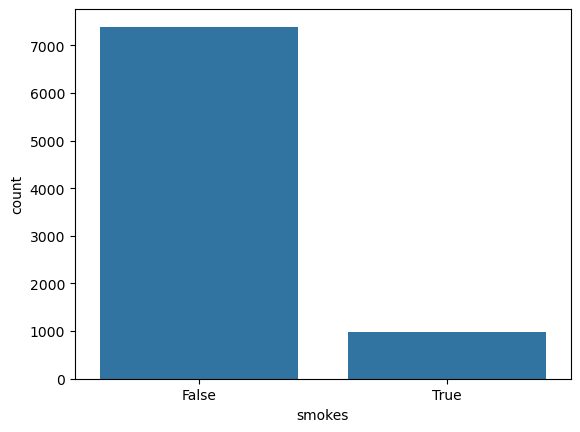

In [81]:
subset_df_2["smokes"] = subset_df_2["AvgCigarettesdayDuringPast30Days"].apply(lambda x: True if x>0 else False)
sns.countplot(subset_df_2, x="smokes")

3. 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

$MSE(m) = (1/N) \sum_{i=1}^N {(y_i − m)}^2 w_i$

where weights are defined as:

$w_i = (1/h) k((z − x_i)/h)$

$\frac{\partial}{\partial m} MSE(m) = \frac{\partial}{\partial m} \left[ (1/N) \sum_{i=1}^N {y_i − m}^2 \cdot w_i \right]$

$\frac{\partial}{\partial m} MSE(m) = (1/N) \sum_{i=1}^N \frac{\partial}{\partial m} \left[ {y_i − m}^2 \cdot w_i \right]$

$\frac{\partial}{\partial m} MSE(m) = (1/N) \sum_{i=1}^N \frac{\partial}{\partial m} \left[ {y_i − m}^2 \right] \cdot w_i$

$\frac{\partial}{\partial m} \left[ {y_i − m}^2 \right] = \frac{\partial}{\partial m} \left[ (y_i - m)^2 \right] = -2(y_i - m)$

$\frac{\partial}{\partial m} MSE(m) = (1/N) \sum_{i=1}^N -2(y_i - m) \cdot w_i$

$\frac{\partial}{\partial m} MSE(m) = -(2/N) \sum_{i=1}^N (y_i - m) \cdot w_i$

$-(2/N) \sum_{i=1}^N (y_i - m) \cdot w_i = 0$

$\sum_{i=1}^N (y_i - m) \cdot w_i = 0$

$\sum_{i=1}^N y_i \cdot w_i - \sum_{i=1}^N m \cdot w_i = 0$

$\sum_{i=1}^N y_i \cdot w_i - m \cdot \sum_{i=1}^N w_i = 0$

$m \cdot \sum_{i=1}^N w_i = \sum_{i=1}^N y_i \cdot w_i$

$m = \frac{\sum_{i=1}^N y_i \cdot w_i}{\sum_{i=1}^N w_i}$

Substituting $w_i$ back

$m = \hat{y}(z) = \frac{\sum_{i=1}^N y_i \cdot (1/h) k((z − x_i)/h)}{\sum_{i=1}^N (1/h) k((z − x_i)/h)}$

4. 
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

5. 
- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome

In [91]:
ames_df = pd.read_csv("data/ames_prices.csv")
ames_df.columns

Index(['Order', 'PID', 'area', 'price', 'MS.SubClass', 'MS.Zoning',
       'Lot.Frontage', 'Lot.Area', 'Street', 'Alley', 'Lot.Shape',
       'Land.Contour', 'Utilities', 'Lot.Config', 'Land.Slope', 'Neighborhood',
       'Condition.1', 'Condition.2', 'Bldg.Type', 'House.Style',
       'Overall.Qual', 'Overall.Cond', 'Year.Built', 'Year.Remod.Add',
       'Roof.Style', 'Roof.Matl', 'Exterior.1st', 'Exterior.2nd',
       'Mas.Vnr.Type', 'Mas.Vnr.Area', 'Exter.Qual', 'Exter.Cond',
       'Foundation', 'Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure',
       'BsmtFin.Type.1', 'BsmtFin.SF.1', 'BsmtFin.Type.2', 'BsmtFin.SF.2',
       'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'Heating', 'Heating.QC', 'Central.Air',
       'Electrical', 'X1st.Flr.SF', 'X2nd.Flr.SF', 'Low.Qual.Fin.SF',
       'Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'Full.Bath', 'Half.Bath',
       'Bedroom.AbvGr', 'Kitchen.AbvGr', 'Kitchen.Qual', 'TotRms.AbvGrd',
       'Functional', 'Fireplaces', 'Fireplace.Qu', 'Garage.Type',
       'Garage.Yr.B

In [92]:
###ADAPTED FROM https://github.com/ds4e/understanding_uncertainty/blob/main/00_intro/02_using_information.ipynb
def lcls(x,y):
    grid = np.sort(x.unique())
    h = 0.9 * min(np.std(x), (np.quantile(x,.75) - np.quantile(x,.25))/1.34) * len(x) **(-0.2)
    I = -(x.to_numpy().reshape(-1,1)-grid.reshape(1,-1) )**2
    K = np.exp(I/(2*h**2) )/np.sqrt(2*np.pi*h**2 )
    y_hat = (y@K)/(np.sum(K,axis=0))
    return y_hat, grid

<Axes: xlabel='Year.Built', ylabel='price'>

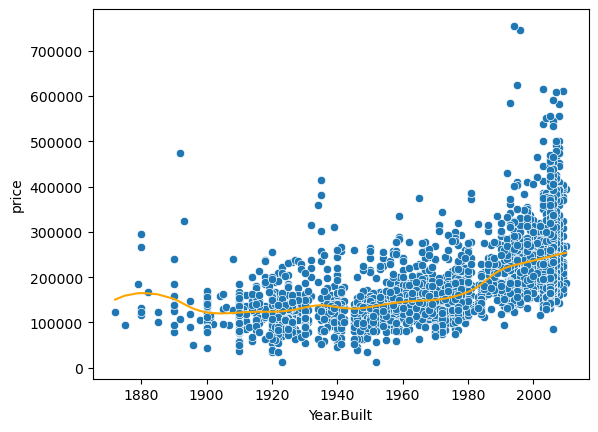

In [108]:
y_hat, grid = lcls(ames_df["Year.Built"],ames_df["price"])

sns.scatterplot(data=ames_df, x = "Year.Built", y='price')
sns.lineplot(x=grid,y=y_hat, color='orange')


Given the scatterplot + the CEF above, we can see that the year the house was built only really has an effect on the price towards the ends of the spectrum. I believe it is likely semi-causal. The nicer/impressive the house, the more likely it would have been to survive being demolished/remodeled/abandoned. Therefore, due to something similar to survivorship bias, only the more expensive and impressive houses have survived. Thus contributing to the rise in expected price at the lower end of the "year built" range. Similarly, the houses that are built more recently likely have amenities that are more in-line with modern expectations. For both of these cases, despite the fact that the year the house is built isnt the complete explanation for price, year built acts as a proxy, and we can thus use the model regardless. However, the usefulness of the model begins to diminish as you encounter entries that are not represented in the dataset.

<Axes: xlabel='Lot.Area', ylabel='X1st.Flr.SF'>

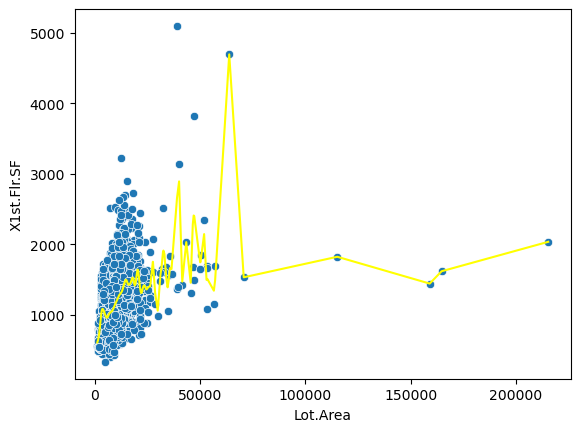

In [111]:
y_hat_1, grid_1 = lcls(ames_df["Lot.Area"],ames_df["X1st.Flr.SF"])

sns.scatterplot(data=ames_df, x = "Lot.Area", y="X1st.Flr.SF")
sns.lineplot(x=grid_1,y=y_hat_1, color='yellow')

From the scatterplot & CEF above, we can see that as the first floor area increases, the total lot area also increases. While the relationship breaks down above a certain point as the data becomes sparse. This relationship is plausible, as a house CANNOT be larger in area than the total lot area. We would expect them to be proportionate. However, understanding that both variables are tied back to price & thus back to the total expenditure is also important. Given this, we can still use the model to predict the square footage of the first floor given the lot area. However, not above about 40,000 square feet, as the CEF goes wild.